In [1]:
import requests
import json
import matplotlib
import numpy as np

In [2]:
def order_book_url(region_id, type_id):
    return f"https://esi.evetech.net/latest/markets/{region_id}/orders/?datasource=tranquility&order_type=all&page=1&type_id={type_id}"


In [3]:
response = requests.get(order_book_url(10000002, 623))

In [4]:
data = json.loads(response.content)

In [5]:
def compile_buy_orders(data):
    buy_orders = {}
    buy_movement = {}
    sell_orders = {}
    sell_movement = {}
    for x in data:
        if x['is_buy_order']:
            if x['price'] in buy_orders:
                buy_orders[x['price']] += x['volume_remain']
                buy_movement[x['price']] += x['volume_total']
            else:
                buy_orders[x['price']] = x['volume_remain']
                buy_movement[x['price']] = x['volume_total']
        else:
            if x['price'] in sell_orders:
                sell_orders[x['price']] += x['volume_remain']
                sell_movement[x['price']] += x['volume_total']
            else:
                sell_orders[x['price']] = x['volume_remain']
                sell_movement[x['price']] = x['volume_total']
                
    return buy_orders, buy_movement, sell_orders, sell_movement

In [6]:
buy_orders, buy_movement, sell_orders, sell_movement = compile_buy_orders(data)

In [7]:
buy_orders

{7000010.16: 3,
 100.1: 10,
 5511002.44: 20,
 5511002.08: 12,
 6200000.04: 9,
 7151002.05: 11,
 6300003.22: 10,
 6101000.04: 4,
 6300001.01: 33,
 6350013.0: 49,
 3810026.02: 1,
 5511002.45: 8,
 6350013.01: 8,
 6350012.01: 14,
 1409050.12: 9,
 7200000.01: 4,
 7200001.0: 36}

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
prices = sorted(list(buy_orders.keys()))
volumes = [buy_orders[x] for x in list(buy_orders.keys())]

In [31]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))

In [32]:
weighted_avg_and_std(prices, volumes)

(5922668.06746888, 1460607.6313051875)

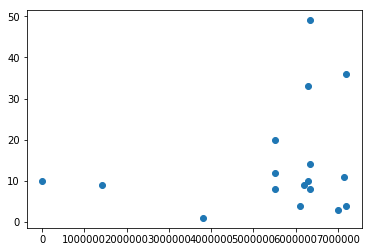

In [19]:
plt.scatter(list(buy_orders.keys()), )

[7000010.16,
 100.1,
 5511002.44,
 5511002.08,
 6200000.04,
 7151002.05,
 6300003.22,
 6101000.04,
 6300001.01,
 6350013.0,
 3810026.02,
 5511002.45,
 6350013.01,
 6350012.01,
 1409050.12,
 7200000.01,
 7200001.0]

In [ ]:
import concurrent.futures
import requests
import threading
import time